In [1]:
import numpy as np
import pandas as pd
import pyswarms as ps
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

2020-06-05 15:18:39,933 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


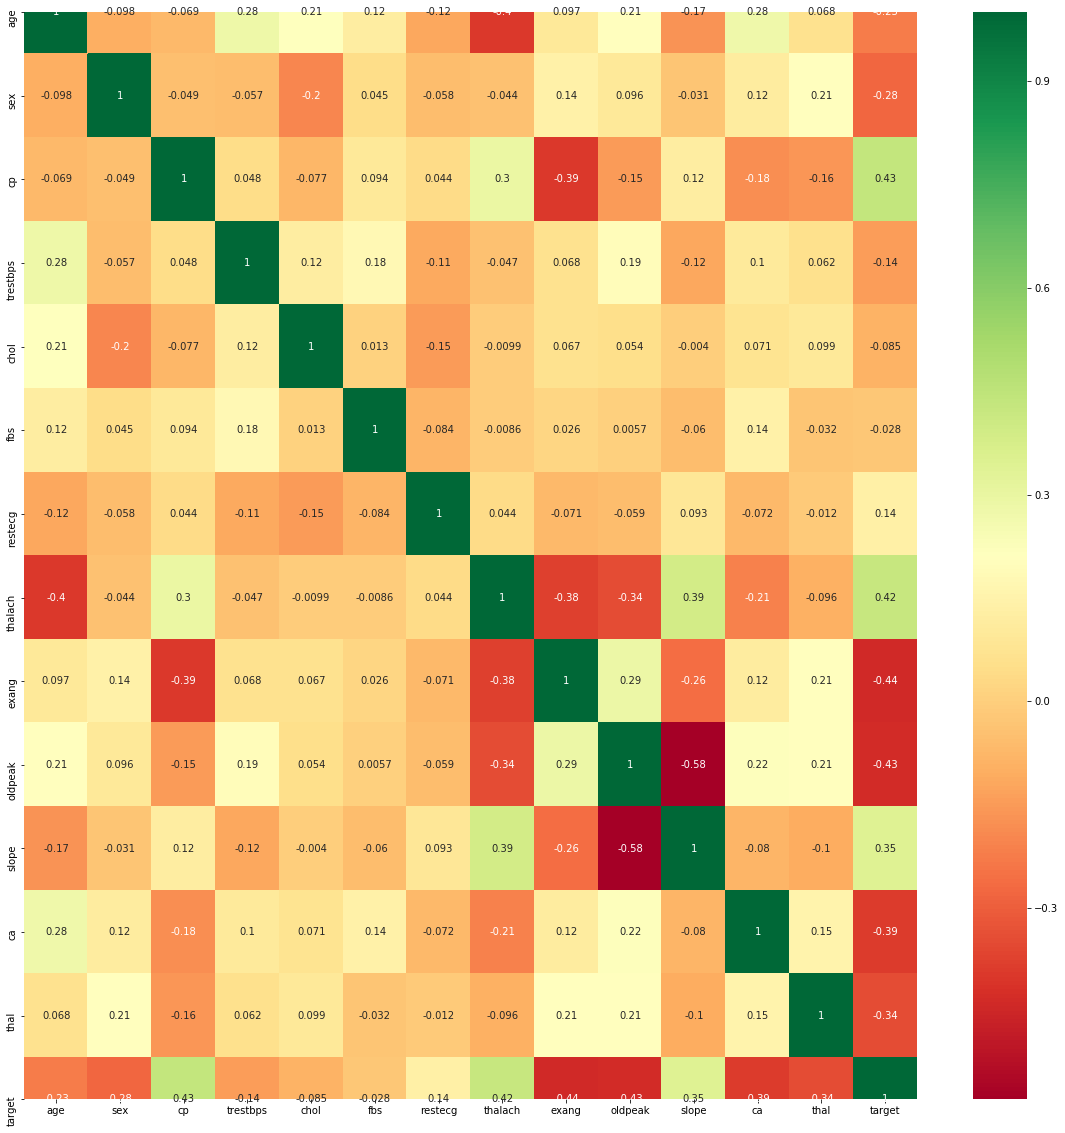

In [6]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268E0211888>,
      dtype=object)

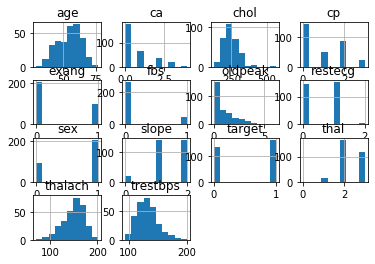

In [7]:
df.hist()

In [8]:
df.isnull().sum().sum()

0

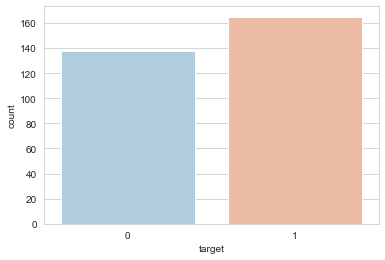

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [10]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [12]:
dataset.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   

   cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
0     0     0  ...        0     1     0     0     0     0       0       1   
1     0     0  ...        0     1     0     0     0     0       0       0   
2     0     1  ...        1     1     0     0     0     0       0       0   
3     0     1  ...        1     1     0     0     0     0       0       0   
4     1     0  ...        1     1     0     0     0     0       0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 31 columns]

In [13]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [14]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

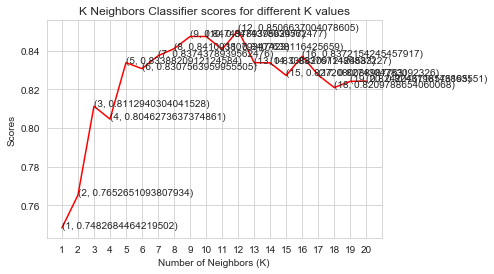

In [15]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8506637004078605

In [17]:
randomforest_classifier= RandomForestClassifier(n_estimators=100,random_state=1)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()
#score.std()

0.8443270300333705

In [18]:
gnb=GaussianNB()
gnb.fit(X,y)
#(gnb.predict(X)==y).mean()
score=cross_val_score(gnb,X,y,cv=10)
score.mean()

0.800956618464961

In [19]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('rf', randomforest_classifier),('knn',knn_classifier)], voting='soft', weights=[1,2])
for clf, label in zip([randomforest_classifier, knn_classifier, eclf], ['Random Forest', 'knn', 'Ensemble']):
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
        print("Accuracy: %f (+/- %f) [%s]" % (scores.mean(), scores.std(), label))
        
#eclf.fit(X,y)
#score=cross_val_score(eclf,X,y,cv=10)
#score.mean()
#score

Accuracy: 0.844327 (+/- 0.065326) [Random Forest]
Accuracy: 0.850664 (+/- 0.063798) [knn]
Accuracy: 0.847545 (+/- 0.058895) [Ensemble]


In [20]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('rf', randomforest_classifier),('knn',knn_classifier), ('nb', gnb)], voting='hard')
for clf, label in zip([randomforest_classifier, knn_classifier,  gnb, eclf], ['Random Forest', 'knn', 'naive Bayes', 'Ensemble']):
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
        print("Accuracy: %f (+/- %f) [%s]" % (scores.mean(), scores.std(), label))
        
#eclf.fit(X,y)
#score=cross_val_score(eclf,X,y,cv=10)
#score.mean()
#score

Accuracy: 0.844327 (+/- 0.065326) [Random Forest]
Accuracy: 0.850664 (+/- 0.063798) [knn]
Accuracy: 0.800957 (+/- 0.077524) [naive Bayes]
Accuracy: 0.844097 (+/- 0.068069) [Ensemble]


In [21]:
#df = pd.read_csv("dataset.csv")

In [22]:
df.iloc[0:12]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1      160      0      1.2   
11   48    0   2       130   275    0        1      139      0      0.2   

    slope  ca  thal  target  
0       0   0     1       1  
1       0   0     2       1  
2       2   0     2       1  
3       2   0     2       1  
4       2   0     2       1  
5       1   0     1       1  
6       1   0     2       1  
7       2   0     3       1  
8       2   0     3       1  
9       2   0     2       1  
10      2   0     2       1  
11      2   0     2       1

In [23]:
#from sklearn import linear_model
#classifier = linear_model.LogisticRegression()

In [24]:
df = pd.read_csv("dataset.csv")

In [25]:
df.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1

In [26]:
df= df.rename(columns ={'age':0,'sex':1,'cp':2,'trestbps':3,'chol':4,'fbs':5,'restecg':6,'thalach':7,'exang':8,'oldpeak':9,'slope':10,'ca':11,'thal':12 })
df.head()

0  1  2    3    4  5  6    7  8    9  10  11  12  target
0  63  1  3  145  233  1  0  150  0  2.3   0   0   1       1
1  37  1  2  130  250  0  1  187  0  3.5   0   0   2       1
2  41  0  1  130  204  0  0  172  0  1.4   2   0   2       1
3  56  1  1  120  236  0  1  178  0  0.8   2   0   2       1
4  57  0  0  120  354  0  1  163  1  0.6   2   0   2       1

In [27]:
zf = df.copy()
zf.head(3)

0  1  2    3    4  5  6    7  8    9  10  11  12  target
0  63  1  3  145  233  1  0  150  0  2.3   0   0   1       1
1  37  1  2  130  250  0  1  187  0  3.5   0   0   2       1
2  41  0  1  130  204  0  0  172  0  1.4   2   0   2       1

In [28]:
zf.drop(['target'],axis=1)

0   1   2    3    4   5   6    7   8    9   10  11  12
0    63   1   3  145  233   1   0  150   0  2.3   0   0   1
1    37   1   2  130  250   0   1  187   0  3.5   0   0   2
2    41   0   1  130  204   0   0  172   0  1.4   2   0   2
3    56   1   1  120  236   0   1  178   0  0.8   2   0   2
4    57   0   0  120  354   0   1  163   1  0.6   2   0   2
..   ..  ..  ..  ...  ...  ..  ..  ...  ..  ...  ..  ..  ..
298  57   0   0  140  241   0   1  123   1  0.2   1   0   3
299  45   1   3  110  264   0   1  132   0  1.2   1   0   3
300  68   1   0  144  193   1   1  141   0  3.4   1   2   3
301  57   1   0  130  131   0   1  115   1  1.2   1   1   3
302  57   0   1  130  236   0   0  174   0  0.0   1   1   2

[303 rows x 13 columns]

In [29]:
y=np.array(df['target'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
zf['target']
features_name=[0,1,2,3,4,5,6,7,8,9,10,11,12]
X=np.array(df[features_name])
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [31]:
features_name=[0,1,2,3,4,5,6,7,8,9,10,11,12]
x=np.array(df[features_name])
y=np.array(df['target'])

def f_per_particle(m, alpha):
    total_features = 13
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    knn_classifier = KNeighborsClassifier(n_neighbors = 12)
    score=cross_val_score(knn_classifier,X_subset,y,cv=10)
    #andomforest_classifier= RandomForestClassifier(n_estimators=100, random_state=1)
    #core=cross_val_score(randomforest_classifier,X_subset,y,cv=10)
    P=score.mean()
    #classifier.fit(X_subset, y)
    #P = (classifier.predict(X_subset) == y).mean()
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j

def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)


options = {'c1': 1.47, 'c2': 1.47, 'w':0.7, 'k': 30, 'p':2}


dimensions = 13 
optimizer = ps.discrete.BinaryPSO(n_particles=303, dimensions=dimensions, options=options)
optimizer.reset()


cost, pos = optimizer.optimize(f ,iters=20)

X_selected_features = X[:,pos==1]

df1 = pd.DataFrame(X_selected_features)
df1['target'] = pd.Series(y)

#sns.pairplot(df, hue='target')
#sns.pairplot(df1, hue='target')

#plt.show()

df1.to_csv("dataset1.csv")

2020-06-05 15:18:50,003 - pyswarms.discrete.binary - INFO - Optimize for 20 iters with {'c1': 1.47, 'c2': 1.47, 'w': 0.7, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|20/20, best_cost=0.177
2020-06-05 15:20:49,632 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.17725322152819384, best pos: [0 1 1 0 0 1 1 0 1 1 1 1 1]


In [58]:
cf = pd.read_csv("dataset1.csv",index_col=0)
#cf = cf.loc[:, ~cf.columns.str.contains('^Unnamed')]
cf.head(10)

0    1    2    3    4    5    6    7    8  target
0  1.0  3.0  1.0  0.0  0.0  2.3  0.0  0.0  1.0       1
1  1.0  2.0  0.0  1.0  0.0  3.5  0.0  0.0  2.0       1
2  0.0  1.0  0.0  0.0  0.0  1.4  2.0  0.0  2.0       1
3  1.0  1.0  0.0  1.0  0.0  0.8  2.0  0.0  2.0       1
4  0.0  0.0  0.0  1.0  1.0  0.6  2.0  0.0  2.0       1
5  1.0  0.0  0.0  1.0  0.0  0.4  1.0  0.0  1.0       1
6  0.0  1.0  0.0  0.0  0.0  1.3  1.0  0.0  2.0       1
7  1.0  1.0  0.0  1.0  0.0  0.0  2.0  0.0  3.0       1
8  1.0  2.0  1.0  1.0  0.0  0.5  2.0  0.0  3.0       1
9  1.0  2.0  0.0  1.0  0.0  1.6  2.0  0.0  2.0       1

In [59]:
columns_to_scale = ['1','5', '6','8']
cf[columns_to_scale] = standardScaler.fit_transform(cf[columns_to_scale])

In [60]:
cf1=cf.copy()
#cf1 = cf1.loc[:, ~cf1.columns.str.contains('^Unnamed')]
cf1.head()

0         1    2    3    4         5         6    7         8  target
0  1.0  1.973123  1.0  0.0  0.0  1.087338 -2.274579  0.0 -2.148873       1
1  1.0  1.002577  0.0  1.0  0.0  2.122573 -2.274579  0.0 -0.512922       1
2  0.0  0.032031  0.0  0.0  0.0  0.310912  0.976352  0.0 -0.512922       1
3  1.0  0.032031  0.0  1.0  0.0 -0.206705  0.976352  0.0 -0.512922       1
4  0.0 -0.938515  0.0  1.0  1.0 -0.379244  0.976352  0.0 -0.512922       1

In [61]:
b = cf1['target']
a = cf1.drop(['target'], axis = 1)

In [62]:
#from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,a,b,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

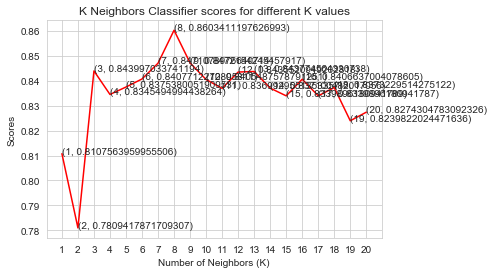

In [63]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [64]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn2,a,b,cv=10)
score.mean()

0.8603411197626993

In [78]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=50,random_state=0)
score=cross_val_score(randomforest_classifier,a,b,cv=10)
score.mean()

0.8246421950315165

In [66]:
gnb=GaussianNB()
gnb.fit(a,b)
#(gnb.predict(a)==b).mean()
score=cross_val_score(gnb,a,b,cv=10)
score.mean()

0.8072932888394513

In [67]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('rf', randomforest_classifier),('knn',knn2)], voting='soft', weights=[1, 2])
for clf, label in zip([randomforest_classifier, knn2, eclf], ['Random Forest', 'knn', 'Ensemble']):
        scores = cross_val_score(clf, a, b, scoring='accuracy', cv=10)
        print("Accuracy: %f (+/- %f) [%s]" % (scores.mean(), scores.std(), label))
        
#eclf.fit(X,y)
#score=cross_val_score(eclf,X,y,cv=10)
#score.mean()
#score

Accuracy: 0.827753 (+/- 0.046522) [Random Forest]
Accuracy: 0.860341 (+/- 0.059990) [knn]
Accuracy: 0.853660 (+/- 0.059235) [Ensemble]


In [68]:
Q1 = cf1.quantile(0.25)
Q3 = cf1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0         1.000000
1         1.941092
2         0.000000
3         1.000000
4         1.000000
5         1.380313
6         1.625465
7         1.000000
8         1.635951
target    1.000000
dtype: float64


In [69]:
#filtered = cf.query('(@Q1 - 1.5 * @IQR) <= cf <= (@Q3 + 1.5 * @IQR)')

In [44]:
#print(cf1 < (Q1 - 1.5 * IQR)) |(cf1 > (Q3 + 1.5 * IQR))

In [45]:
#cf_out = cf[~((cf < (Q1 - 1.5 * IQR)) |(cf > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(cf_out.shape)

In [70]:
#cf1.drop(cf[(cf < (Q1 - 1.5 * IQR)) |(cf > (Q3 + 1.5 * IQR)].index, inplace=true)
index=cf1[~((cf1 < (Q1 - 1.5 * IQR)) |(cf1 > (Q3 + 1.5 * IQR))).any(axis=1)]
#cf.drop(index,inplace=True)
index

0         1    2    3    4         5         6    7         8  target
1    1.0  1.002577  0.0  1.0  0.0  2.122573 -2.274579  0.0 -0.512922       1
2    0.0  0.032031  0.0  0.0  0.0  0.310912  0.976352  0.0 -0.512922       1
3    1.0  0.032031  0.0  1.0  0.0 -0.206705  0.976352  0.0 -0.512922       1
4    0.0 -0.938515  0.0  1.0  1.0 -0.379244  0.976352  0.0 -0.512922       1
5    1.0 -0.938515  0.0  1.0  0.0 -0.551783 -0.649113  0.0 -2.148873       1
..   ...       ...  ...  ...  ...       ...       ...  ...       ...     ...
296  0.0 -0.938515  0.0  1.0  1.0 -0.896862 -0.649113  0.0 -0.512922       0
298  0.0 -0.938515  0.0  1.0  1.0 -0.724323 -0.649113  0.0  1.123029       0
299  1.0  1.973123  0.0  1.0  0.0  0.138373 -0.649113  0.0  1.123029       0
301  1.0 -0.938515  0.0  1.0  1.0  0.138373 -0.649113  1.0  1.123029       0
302  0.0  0.032031  0.0  0.0  0.0 -0.896862 -0.649113  1.0 -0.512922       0

[235 rows x 10 columns]

In [71]:
index.info()
#cf.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 302
Data columns (total 10 columns):
0         235 non-null float64
1         235 non-null float64
2         235 non-null float64
3         235 non-null float64
4         235 non-null float64
5         235 non-null float64
6         235 non-null float64
7         235 non-null float64
8         235 non-null float64
target    235 non-null int64
dtypes: float64(9), int64(1)
memory usage: 20.2 KB


In [72]:
d = index['target']
c = index.drop(['target'], axis = 1)

In [73]:
knn3 = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn3,c,d,cv=10)
score.mean()

0.8545289855072463

In [76]:
randomforest_classifier= RandomForestClassifier(n_estimators=50,random_state=0)
score=cross_val_score(randomforest_classifier,c,d,cv=10)
score.mean()

0.807427536231884

In [77]:
gnb=GaussianNB()
gnb.fit(c,d)
#(gnb.predict(a)==b).mean()
score=cross_val_score(gnb,c,d,cv=10)
score.mean()

0.8081521739130435

In [52]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('rf', randomforest_classifier),('knn',knn3)], voting='soft', weights=[1, 2])
for clf, label in zip([randomforest_classifier, knn3,  eclf], ['Random Forest', 'knn', 'Ensemble']):
        scores = cross_val_score(clf, c, d, scoring='accuracy', cv=10)
        print("Accuracy: %f (+/- %f) [%s]" % (scores.mean(), scores.std(), label))
        
#eclf.fit(X,y)
#score=cross_val_score(eclf,X,y,cv=10)
#score.mean()
#score

Accuracy: 0.803442 (+/- 0.086412) [Random Forest]
Accuracy: 0.829348 (+/- 0.067681) [knn]
Accuracy: 0.833333 (+/- 0.066862) [Ensemble]
